In [6]:
from aocd import get_data
import networkx as nx
import matplotlib.pyplot as plt

8
516


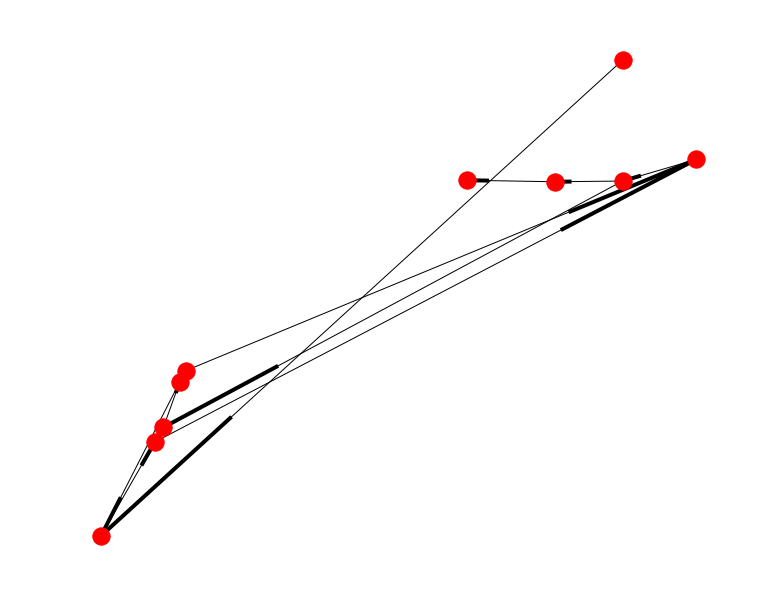

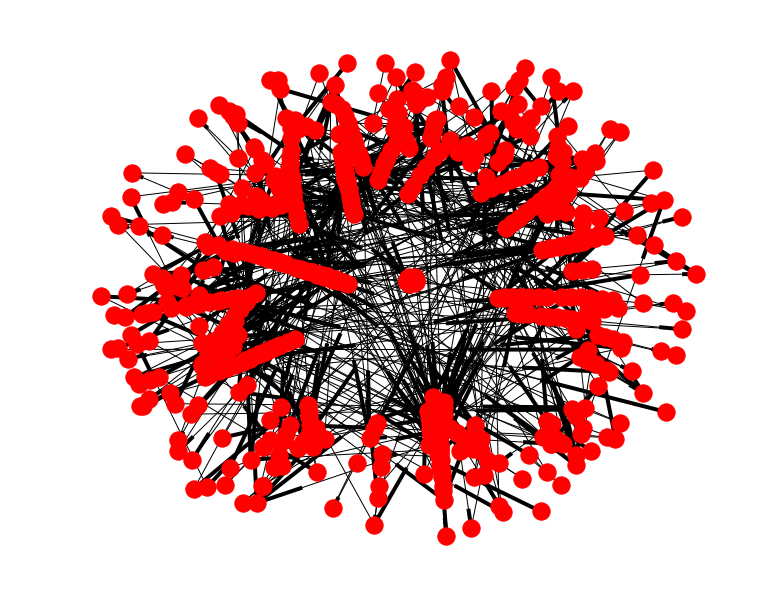

In [67]:
g = nx.DiGraph() # multi-graph so we don't overwrite any connection if we accidentally set it twice
BIG = 10000

example = """nop +0
acc +1
jmp +4
acc +3
jmp -3
acc -99
acc +1
jmp -4
acc +6"""

for data in [example, get_data(day=8)]:
    for nr, line in enumerate(data.split("\n")):
        ins, val = line.split(" ")
        val = int(val)
        if ins == "nop":
            # overwrite graph 
            g.add_edge(nr, nr+val, weight=BIG)
            g.add_edge(nr, nr+1, weight=0)
        elif ins == "jmp":
            g.add_edge(nr, nr+1, weight=BIG)
            g.add_edge(nr, nr+val, weight=0)
        elif ins == "acc":
            g.add_edge(nr, nr+1, weight=val)

    print(nx.shortest_path_length(g, 0, nr+1, weight="weight") - BIG)
    plt.figure(figsize=(10,8))
    nx.draw_spring(g)